### Google Images API

Have you ever wanted to put your own take on a deep learning image project, but didn't know how to create a pipeline for the images you needed? 

This tutorial will go over the process of scaping images from Google Search as well as processing the images in any size you may desire. All of these steps are modified from the site [GeeksforGeeks](https://www.geeksforgeeks.org/how-to-download-google-images-using-python/), referncing Hardik Vasa's [github](https://github.com/hardikvasa/google-images-download).


In [35]:
!pip install Image

In [36]:
!pip install google_images_download

In [37]:
# importing google_images_download module 
from google_images_download import google_images_download  
  
# creating object to use in our function
response = google_images_download.googleimagesdownload() 

The way we're gonig to create our function will allow us to search multiple queries at once. A new folder for each query will be downloaded in a directory called "downloads," which can be accessed in your current working directory.

In [38]:
search_queries = ['test']
#search_queries = ['giraffe', 'giraffe eating', 'giraffe safari']

Here are some of the arguments to take note of
- Keywords are are our queries
- Format is the image file format 
- Limit is the number of images to be downloaded (max is 100)
- print urls is to print the image file url 
- size is the image size which can be specified manually ("large, medium, icon") 
- aspect ratio denotes the height width ratio of images to download. ("tall, square, wide, panoramic") 
- typically, each image has a count to start (1.img.jpg, 2.girimg.jpg, etc.), no numbering prevents that

For my project I needed over 600 images, so the 100 image limit created an issue as running the code multiple times resulted in mostly the same images. To overcome that issue I ran the code over different sizes and aspect ratios. I also added in "no_numbering" so we didn't double count the same image. 

In [39]:
def downloadimages(query): 
    
    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit":10, 
                 "print_urls":True, 
                 "size": "medium", 
                 "aspect_ratio": "wide",
                 "no_numbering": "--no_numbering"} 
    
    try: 
        response.download(arguments) 
      
    
    # Handling File NotFound Error     
    except FileNotFoundError:  
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":10, 
                     "print_urls":True,  
                     "size": "medium",
                     "no_numbering": "--no_numbering"} 
                       
        # Providing arguments for the searched query 
        try: 
            # Downloading the photos based 
            # on the given arguments 
            response.download(arguments)  
        except: 
            pass

In [40]:
# Driver Code 
for query in search_queries: 
    downloadimages(query)  
    print()  


Item no.: 1 --> Item name = test
Evaluating...
Starting Download...
Image URL: https://www.outbrain.com/techblog/wp-content/uploads/2017/05/road-sign-361513_960_720.jpg
Completed Image ====> 1.road-sign-361513_960_720.jpg
Image URL: https://cdn.cnn.com/cnnnext/dam/assets/160224172541-sat-test-bubble-super-tease.jpg
Completed Image ====> 2.160224172541-sat-test-bubble-super-tease.jpg
Image URL: https://litcouncil.com/wp-content/uploads/resultados-test_9.jpg
Completed Image ====> 3.resultados-test_9.jpg
Image URL: https://www.davishighnews.com/wp-content/uploads/2018/10/TEST-900x534.jpg
Completed Image ====> 4.TEST-900x534.jpg
Image URL: http://www.flexibleproduction.com/wp-content/uploads/2017/06/test-intelligenza-sociale.jpg
Completed Image ====> 5.test-intelligenza-sociale.jpg
Image URL: https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/pregnancy_tests_ref_guide/493x335_pregnancy_tests_ref_guide.jpg
Completed Image ====> 6.493x335_

For those windows users, let's see where we downloaded these images

In [45]:
import os
 
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : C:\Users\wscott\Downloads


In [47]:
import glob

image_names = glob.glob("/Users/wscott/Downloads/downloads/test/*", recursive= True)

For my project, I needed images of the same size. The next section will go over resizing and cropping of these images to set up my pipeline.

In [43]:
from PIL import Image 

x = 0
basewidth = 256
processed_images = []
original_filenames = []

for images in image_names:
    #Get jpg filename
    filename = images.split('\\',1)[1]
    original_filenames.append(filename)
    im = Image.open(images)

    
    if im.size[0] <= im.size[1]:
        
        #This handles images that have more height than width
        wpercent = (basewidth / float(im.size[0]))
        hsize = int((float(im.size[1]) * float(wpercent)))
        im = im.resize((basewidth, hsize), Image.ANTIALIAS)
        
    else:
        #This handles the opposite
        wpercent = (basewidth / float(im.size[1]))
        hsize = int((float(im.size[0]) * float(wpercent)))
        im = im.resize((hsize, basewidth), Image.ANTIALIAS)    
        
        
    width, height = im.size   # Get dimensions
    left = (width - basewidth)/2
    top = (height - basewidth)/2
    right = (width + basewidth)/2
    bottom = (height + basewidth)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    processed_images.append(im)
    
#Save the images in
for ims in processed_images:
    ims.save('C:/Users/wscott/Downloads/downloads/cropped_test/{}'.format(original_filenames[x]))
    x+= 1

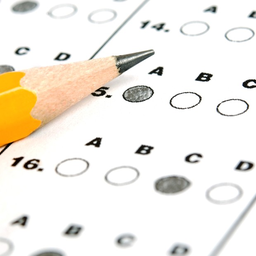

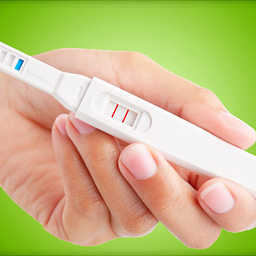

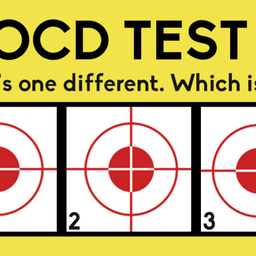

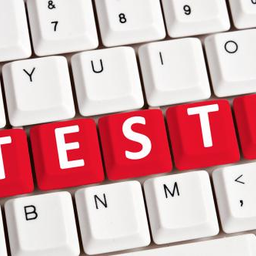

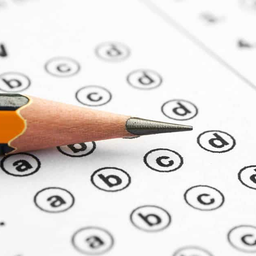

In [44]:
for imgs in processed_images[:5]:
    display(imgs)